## Задание $14^*$
Сопло  Лаваля  описывается  следующим  законом  распределения  площадей  
### $$ \frac{A}{A^*} = \sqrt { 1 + 0.1 \left | \frac{x}{A^*} \right | };  A^* = 1; -10\leq x\leq200 $$
Построить распределение числа Маха в предположении, что при  $М = 3$  располагается прямой  скачок  уплотнения. Шаг  по  координате  при  выводе  результатов $x = 10$.

In [68]:
# coding: utf8
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

A_star = 1.0
k = 1.4 # показатель адиабаты газа (воздух)

In [69]:
def prof(x):
    return np.sqrt(1+0.1*abs(x/A_star))*A_star

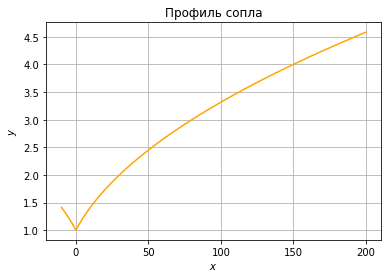

In [70]:
x = np.linspace(-10, 200, num=1000)
plt.title(u'Профиль сопла')
plt.xlabel(u'$x$' )
plt.ylabel(u'$y$')
plt.plot(x,prof(x),'orange')
plt.grid(True)
plt.savefig('prof.png')

Для решения задачи мы можем воспользоваться изэнтропическими формулами.

Параметрическое решение задачи об одномерном газовом потоке в трубе переменного сечения задается формулой:
### $$ \frac{A}{A^*} = \frac{2}{k+1}^{\frac{k+1}{2(k-1)}}\frac{1}{M} {\left ( 1 + \frac{k-1}{2} M^2 \right)}^ \frac{k+1}{2(k-1)} $$

In [71]:
def maxa(M,A):
    return (2.0/(k+1.0))**((k+1.0)/(2*(k-1.0)))*(1.0/M)*(1.0+(k-1.0)/2*M**2)**((k+1.0)/(2*(k-1.0)))-A/A_star

In [72]:
def after_sk(M,A):
    top = 1.0 + (k-1.0)/2*M**2
    floor = 1.0 + (k-1.0)/2*M1**2
    return M1/M*(top/floor)**((k+1.0)/(2*(k-1.0)))-A/A1

In [73]:
def maxaA(M1):
    top = 1.0 + (k-1.0)/2*M1**2
    floor = k*M1**2 - (k-1.0)/2
    return np.sqrt(top/floor)

In [74]:
def MPD(f,A,a,b): 
    eps = 1e-7    
    while abs(b-a) >= eps:
        c = (b+a)/2.0
        if f(c,A) == 0.0:
            break
        if f(a,A)*f(c,A) < 0.0:
            b = c
        else:
            a = c
    return c

In [75]:
M_cr = 3.0
A1 = (2.0/(k+1.0))**((k+1.0)/(2*(k-1.0)))*(1.0/M_cr)*(1.0+(k-1.0)/2*M_cr**2)**((k+1.0)/(2*(k-1.0)))*A_star #сечение скачка
M1 = maxaA(M_cr)
print(M2)
A1

0.4751909633114914


4.234567901234569

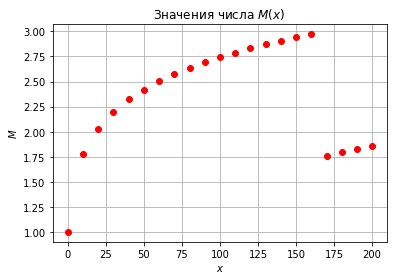

In [76]:
steps = np.arange(10.0,170.0,10.0) # от 10 до 200 с шагом 10
M = [1.0]
for A in prof(steps):  
    M.append(MPD(maxa,A,1,10))
steps = np.arange(170.0,210.0,10.0)
for A in prof(steps):  
    M.append(MPD(after_sk,A,1,10))
steps = np.arange(10.0,210.0,10.0)
steps = np.insert(steps,0,0)
plt.title(u'Значения числа $M(x)$ ')
plt.xlabel(u'$x$' )
plt.ylabel(u'$M$')
plt.plot(steps,M,'ro')
plt.grid(True)
plt.savefig('result.png')

In [77]:
df = pd.DataFrame({
    'X': steps,
    'M': M
 })
writer = pd.ExcelWriter('result.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()
df

,M,X
0,1.000000,0.0
1,1.776840,10.0
2,2.031085,20.0
3,2.197198,30.0
4,2.321350,40.0
5,2.420716,50.0
6,2.503663,60.0
7,2.574919,70.0
8,2.637416,80.0
9,2.693104,90.0
